In [3]:
!pip install pydap
from pydap.client import open_url
import requests
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

# Sea Ice Concentration

## Single Product

In [ ]:
# Open url and check requests
url = 'https://hyrax.terradue.com/opendap/data/amsr2/n6250/netcdf/2019/asi-AMSR2-n6250-20190101-v5.4.nc'
r = requests.get(url + '.dds') # this allows to obtain the raw metadata, using a http request appending the suffix .dds (DAP2)
print(r.text)

In [ ]:
# Open url and check keys
sic = open_url(url)
keys = list(sic.keys())
for key in keys:
    print(key)

In [ ]:
sic.data

In [ ]:
# NB I can access and visualise the data directly without converting them to np.arrays apparently
sic['z.z'][0,0].data

plt.imshow(sic['z.z']); plt.show()

# --------------------------

# Visualise data array IF I NEED TO CONVERT, BUT IT ALSO WORKS DIRECTLY - SEE ABOVE)
x_arr = np.array(sic['x'].data)

y_arr = np.array(sic['y'].data)

z_x_arr = np.array(sic['z.x'].data)

z_y_arr = np.array(sic['z.y'].data)

z_z_arr = np.array(sic['z.z'].data)

In [ ]:
# check the x_arr is equal to z_x_arr
print(np.count_nonzero(x_arr != z_x_arr))

# check the y_arr is equal to z_y_arr
print(np.count_nonzero(y_arr != z_y_arr))

In [ ]:
z_z_arr

In [ ]:
z_z_arr.shape

In [ ]:
# Plot z values, with coordinates x and y
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(z_z_arr)
plt.show()

In [ ]:
z_z_arr[1600,100]

## Time Series

In [4]:
url = 'https://hyrax.terradue.com/opendap/data/ts/amsr2.ncml'
r = requests.get(url + '.dds')
print(r.text)

Dataset {
    String polar_stereographic;
    String time[time = 2478];
    Float64 x[time = 2478][x = 1216];
    Float64 y[time = 2478][y = 1792];
    Grid {
      Array:
        Float32 z[time = 2478][y = 1792][x = 1216];
      Maps:
        String time[time = 2478];
        Float64 y[y = 1792];
        Float64 x[x = 1216];
    } z;
} amsr2.ncml;



In [7]:
sic = open_url(url)
keys = list(sic.keys())
for key in keys:
    print(key)

time
polar_stereographic
x
y
z


In [8]:
sic.data

[BaseProxy('https://hyrax.terradue.com/opendap/data/ts/amsr2.ncml', 'time', dtype('S128'), (2478,), (slice(None, None, None),)),
 BaseProxy('https://hyrax.terradue.com/opendap/data/ts/amsr2.ncml', 'polar_stereographic', dtype('S128'), (), ()),
 BaseProxy('https://hyrax.terradue.com/opendap/data/ts/amsr2.ncml', 'x', dtype('>f8'), (2478, 1216), (slice(None, None, None), slice(None, None, None))),
 BaseProxy('https://hyrax.terradue.com/opendap/data/ts/amsr2.ncml', 'y', dtype('>f8'), (2478, 1792), (slice(None, None, None), slice(None, None, None))),
 [BaseProxy('https://hyrax.terradue.com/opendap/data/ts/amsr2.ncml', 'z.z', dtype('>f4'), (2478, 1792, 1216), (slice(None, None, None), slice(None, None, None), slice(None, None, None))),
  BaseProxy('https://hyrax.terradue.com/opendap/data/ts/amsr2.ncml', 'z.time', dtype('S128'), (2478,), (slice(None, None, None),)),
  BaseProxy('https://hyrax.terradue.com/opendap/data/ts/amsr2.ncml', 'z.y', dtype('>f8'), (1792,), (slice(None, None, None),)),


In [9]:
sic['z.z'].shape

(2478, 1792, 1216)

In [19]:
# Checking that 'z.time' is equal to 'time'
# NOTE RUN 2-3 TIMES TO MAKE IT WORK...

np.unique(sic['z.time'] == sic['time'])

assert sic['z.time'].shape == sic['time'].shape

print('Length of the time series:', sic['z.time'].shape)

Length of the time series: (2478,)


In [12]:
sic['z.z'].data.shape

(2478, 1792, 1216)

In [ ]:
# THIS DOESNT WORK FOR SOME REASONS!

# a_arr = np.array(sic['z.z'].data)

In [47]:
sic_z = sic['z.z'].data
print(np.shape(sic_z))

(2478, 1792, 1216)


In [49]:
# The data is nested. To get the first time stamp (out of 2478 available), I can select with a[0][0]. 
sic_z[0][0] # I need the second [0] otherwise it return the 2-d array inside an array (which is unnecessary). I have to unpack this. 

print('The top-left element of the 2-d array is indexed as: "sic_z[0][0][0,0]" =', sic_z[0][0][0,0])

The top-left element of the 2-d array is indexed as: "sic_z[0][0][0,0]" = nan


In [56]:
np.isnan(sic_z[0][0][0,0])

True

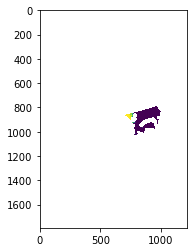

In [92]:
# Plot single timestamp, like the first one --> smap[0]

plt.figure()
plt.imshow(sic_z[0][0]); plt.show()
plt.show()

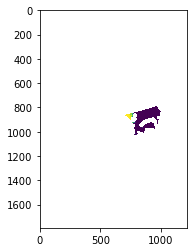

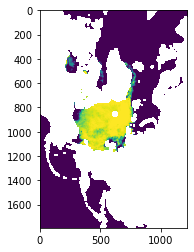

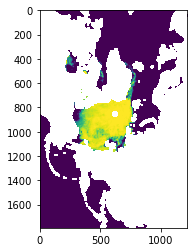

HTTPError: 500 Internal Server Error
Error { 
    code = 500;
    message = "Problem encountered with BES connection. Message: 'Failed to write to socket: Broken pipe (Write failed)' OPeNDAPClient executed 6 prior commands.";
}


In [91]:
# Make animation and save to GIF
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

fig = plt.figure()

ims = []
for i in range(0,5):#sic_z.shape[0]):
    data = sic_z[i][0]
    
    im = plt.imshow(data)
    # use the time (converted to string) as title of the image 
    #title = sic['time'].data[i].decode('UTF-8')[:10]; print(title)
    #im.axes.set_title(title)
    plt.show()
#     ims.append([im])
    
# ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True, repeat=False)

# writer = PillowWriter(fps=2)
# ani.save("sic.gif", writer=writer)

# plt.show()

# Sea Ice Thickness

## Single Product

In [93]:
url = 'https://hyrax.terradue.com/opendap/data/smos_smap/netCDF/north/2018/20180419_north_mix_sit_v100.nc'
r = requests.get(url + '.dds')
print(r.text)

Dataset {
    Float32 smos_thickness[X = 896][Y = 608];
    Float32 smos_thickness_unc[X = 896][Y = 608];
    Float32 smap_thickness[X = 896][Y = 608];
    Float32 smap_thickness_unc[X = 896][Y = 608];
    Float32 combined_thickness[X = 896][Y = 608];
    Float32 combined_thickness_unc[X = 896][Y = 608];
    Int16 flags[X = 896][Y = 608];
} 20180419_north_mix_sit_v100.nc;



In [94]:
sit = open_url(url)
keys = list(sit.keys())
for key in keys:
    print(key)

smos_thickness
smos_thickness_unc
smap_thickness
smap_thickness_unc
combined_thickness
combined_thickness_unc
flags


In [96]:
smos = sit['smos_thickness'].data

smap = sit['smap_thickness'].data

comb = sit['combined_thickness'].data

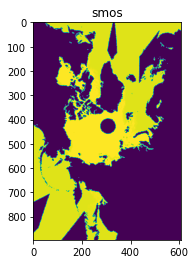

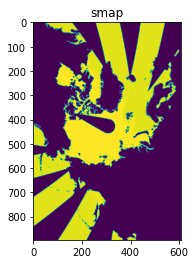

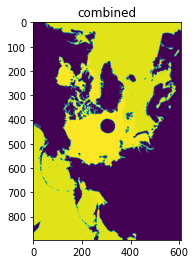

In [99]:
# Plot smos
plt.figure()
plt.imshow(smos); plt.title('smos')
plt.show()

# Plot smap
plt.figure()
plt.imshow(smap); plt.title('smap')
plt.show()

# Plot combined
plt.figure()
plt.imshow(comb); plt.title('combined')
plt.show()

## Time Series

In [ ]:
url = 'https://hyrax.terradue.com/opendap/data/ts/smos_smap.ncml'
r = requests.get(url + '.dds')
print(r.text)

In [ ]:
sit = open_url(url)
keys = list(sit.keys())
for key in keys:
    print(key)

In [ ]:
sit.data

In [ ]:
sit.smos_thickness.shape

In [ ]:
sit.smap_thickness.shape

In [ ]:
sit.time[0:10].data

In [ ]:
smos = np.array(sit['smos_thickness'].data)
smos

In [ ]:
smap = np.array(sit['smap_thickness'].data)
smap

In [ ]:
# Note the shape of smap. The first dimention is the time stamp! so smap[0] is the first in time (with second and third dims being x and y)
smap.shape

In [ ]:
np.round(smap,0)

In [ ]:
smap_nonan = np.where(smap[0]==-999,np.nan,smap[0])
np.nanmax(smap_nonan)

In [ ]:
# Plot single timestamp, like the first one --> smap[0]
from matplotlib import colors
plt.figure()
plt.imshow(np.where(smap[0]==-999,np.nan,smap[0]),norm=colors.Normalize(-0,51))
plt.show()

In [ ]:
smap[0,500,200]

In [ ]:
time = np.array(sit['time'].data)
time

In [ ]:
# convert from bytes_ to string 
time[0].decode('UTF-8')[:10]

In [ ]:
time[:10]

In [ ]:
# Make animation and save to GIF
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

fig = plt.figure()

ims = []
for i in range(0,smap.shape[0]):
    # put -999 to nans
    no_nans = np.where(smap[i]==-999,np.nan,smap[i])
    
    # display only area in the centre for plotting
    im = plt.imshow(no_nans[150:600,100:500])
    # use the time (converted to string) as title of the image 
    title = time[i].decode('UTF-8')[:10]#; print(title)
    im.axes.set_title(title)
    
    ims.append([im])
    
ani = animation.ArtistAnimation(fig, ims, interval=500, blit=True, repeat=False)

writer = PillowWriter(fps=2)
ani.save("smap_test_zoom.gif", writer=writer)

plt.show()